In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"C:\Users\hp\Downloads\Concrete_Data.xls")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [4]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

DATA VISUALISATION

<AxesSubplot:xlabel='Age ', ylabel='Concrete compressive strength'>

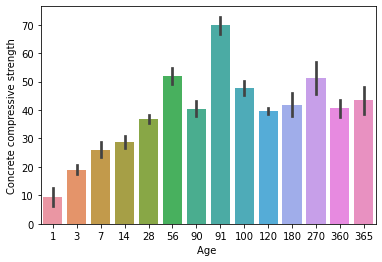

In [5]:
sns.barplot(x='Age ',y='Concrete compressive strength',data=df)

<AxesSubplot:>

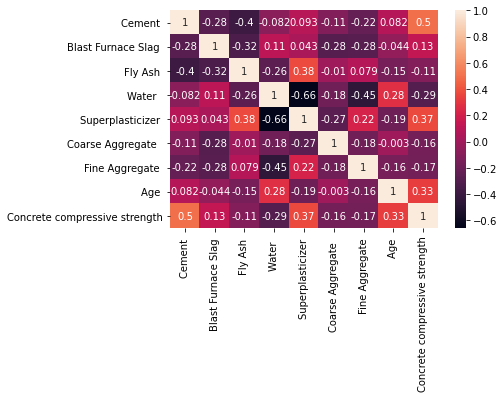

In [6]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

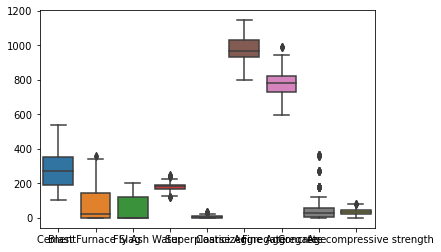

In [7]:
sns.boxplot(data=df)

In [8]:
df.skew()

Cement                           0.509517
Blast Furnace Slag               0.800737
Fly Ash                          0.537445
Water                            0.074324
Superplasticizer                 0.908113
Coarse Aggregate                -0.040206
Fine Aggregate                  -0.252979
Age                              3.269177
Concrete compressive strength    0.416922
dtype: float64

Highly skewed and have outliers

In [9]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [10]:
df.skew()

Cement                           0.509517
Blast Furnace Slag              -0.032692
Fly Ash                          0.537445
Water                            0.074324
Superplasticizer                -0.324634
Coarse Aggregate                -0.040206
Fine Aggregate                  -0.252979
Age                             -0.005085
Concrete compressive strength    0.416922
dtype: float64

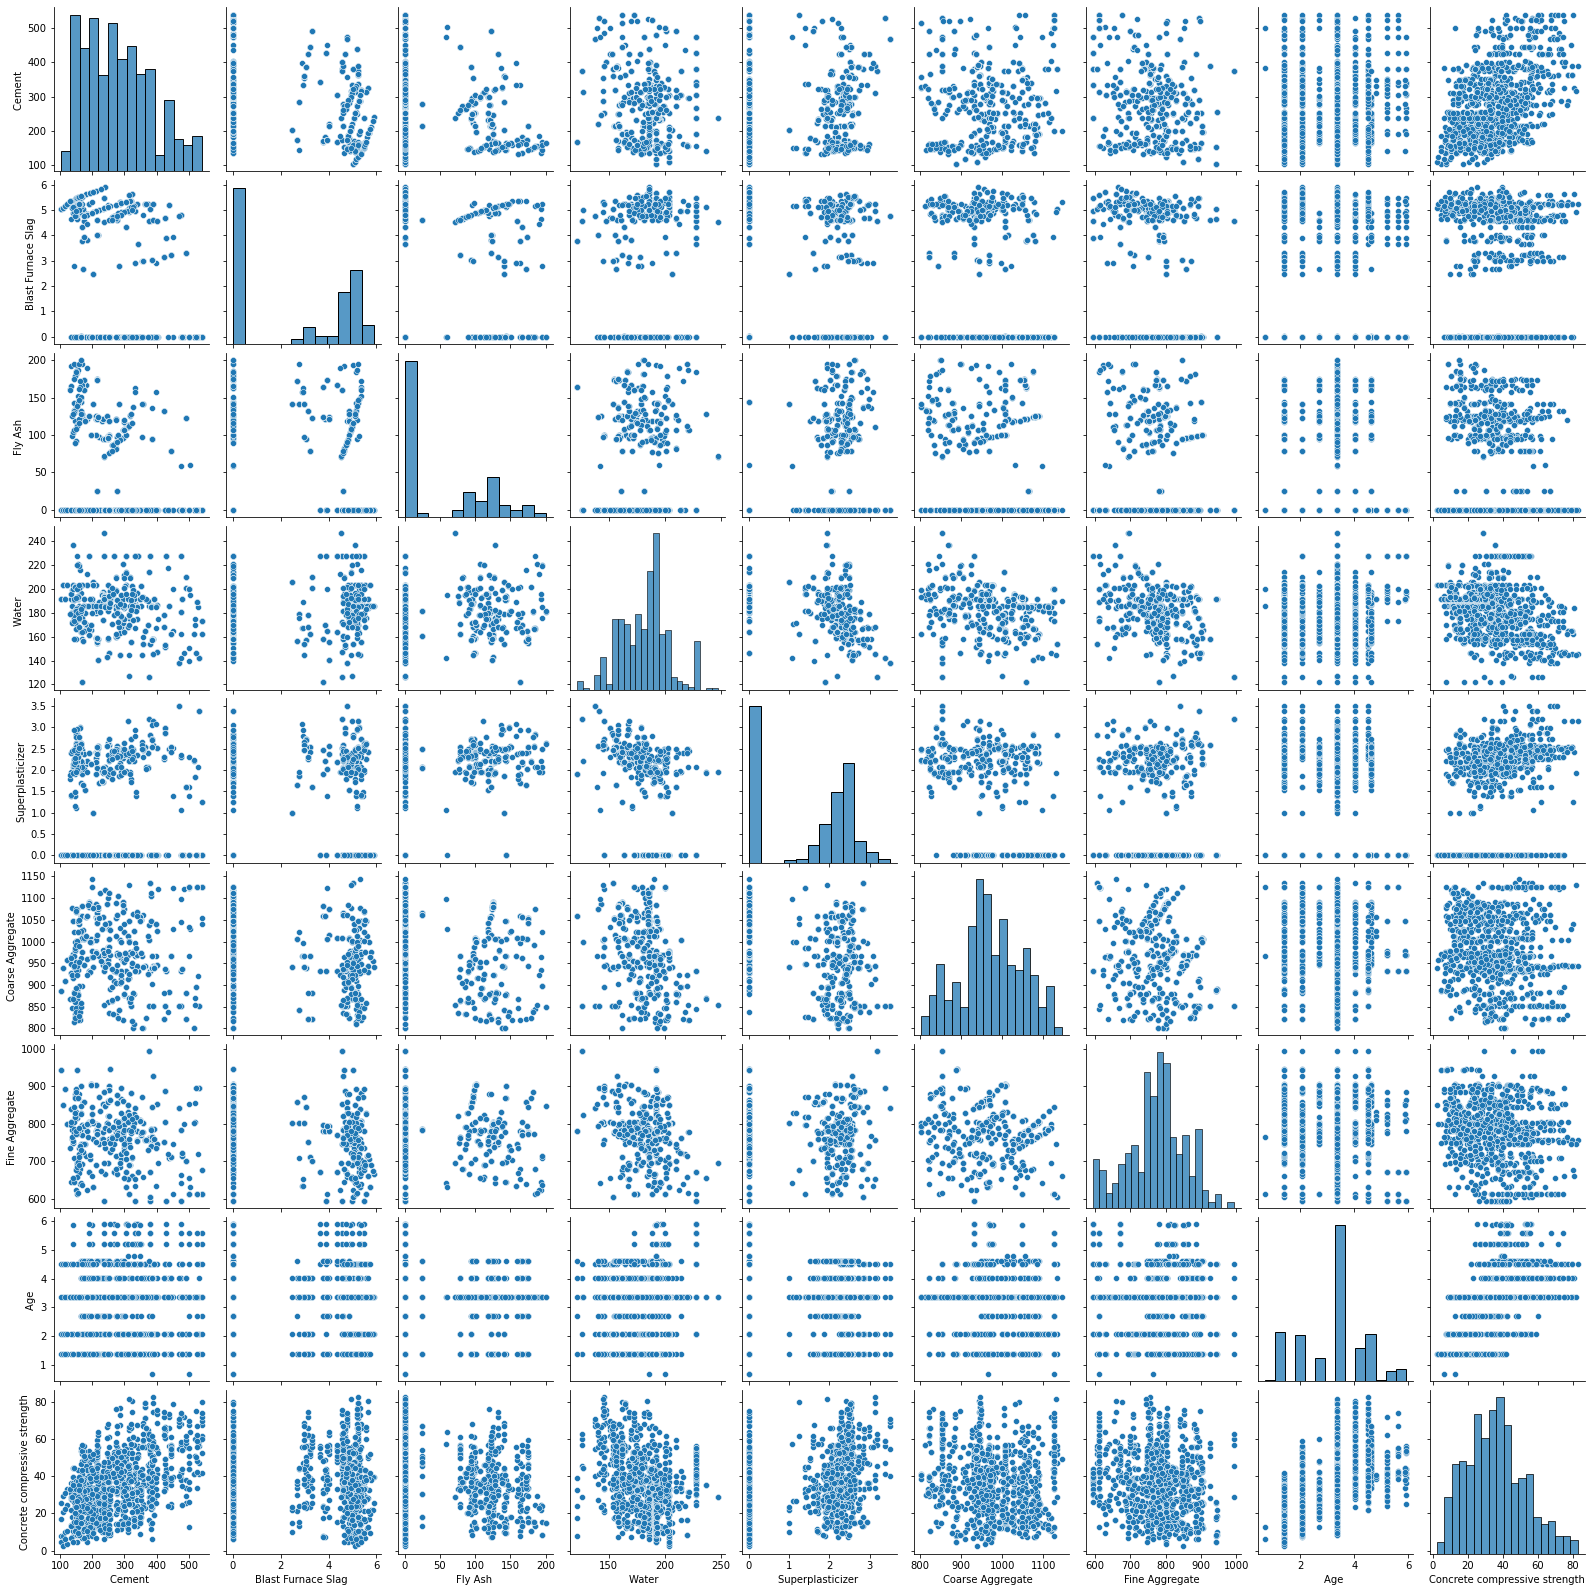

In [11]:
sns.pairplot(df)

In [12]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1030, 9)
(1028, 9)


In [13]:
df_x=df_final.drop(columns=['Concrete compressive strength'])
y=df_final[['Concrete compressive strength']]

In [14]:
df_x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.000000,0.0,162.0,1.252763,1040.0,676.0,3.367296
1,540.0,0.000000,0.0,162.0,1.252763,1055.0,676.0,3.367296
2,332.5,4.966335,0.0,228.0,0.000000,932.0,594.0,5.602119
3,332.5,4.966335,0.0,228.0,0.000000,932.0,594.0,5.902633
4,198.6,4.893352,0.0,192.0,0.000000,978.4,825.5,5.888878


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

In [16]:
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.475120,-1.057478,-0.845849,-0.918239,-0.174001,0.861320,-1.219512,0.112813
1,2.475120,-1.057478,-0.845849,-0.918239,-0.174001,1.054592,-1.219512,0.112813
2,0.490228,1.002120,-0.845849,2.199375,-1.258363,-0.530233,-2.242725,2.124432
3,0.490228,1.002120,-0.845849,2.199375,-1.258363,-0.530233,-2.242725,2.394933
4,-0.790624,0.971853,-0.845849,0.498858,-1.258363,0.067619,0.645980,2.382551


In [17]:
#to check the skewness after scaling
x.skew()

Cement                 0.506965
Blast Furnace Slag    -0.029006
Fly Ash                0.538557
Water                  0.036985
Superplasticizer      -0.322155
Coarse Aggregate      -0.042287
Fine Aggregate        -0.257335
Age                   -0.004424
dtype: float64

TRAINING AND EVALUATING A MODEL

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is:",max_r_score)

r2_score corresponding to random state: 42 is: 0.815666019155441
r2_score corresponding to random state: 43 is: 0.7799057671614542
r2_score corresponding to random state: 44 is: 0.7956770929799887
r2_score corresponding to random state: 45 is: 0.8044855551284562
r2_score corresponding to random state: 46 is: 0.7925376974772513
r2_score corresponding to random state: 47 is: 0.7932224977324389
r2_score corresponding to random state: 48 is: 0.8226035565811926
r2_score corresponding to random state: 49 is: 0.825777596610837
r2_score corresponding to random state: 50 is: 0.7764313194679517
r2_score corresponding to random state: 51 is: 0.8158833759028187
r2_score corresponding to random state: 52 is: 0.7748746468656633
r2_score corresponding to random state: 53 is: 0.8177897586534036
r2_score corresponding to random state: 54 is: 0.7979608947394583
r2_score corresponding to random state: 55 is: 0.8168684029389353
r2_score corresponding to random state: 56 is: 0.8307808104378277
r2_score cor

CROSS VALUATION IS TO CHECK UNDER OR OVER FITTING OF A MODEL

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.6734355961259156

Linear regression gives more accuracy

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print("r2_score is:",r2_score(y_test,y_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score is: 0.8315488268746889
RMSE is: 7.046124516723085
